## Riqueza y Ruina - Nahuel Ghilardi

Modelo de clasificacion de paises segun indices economicos

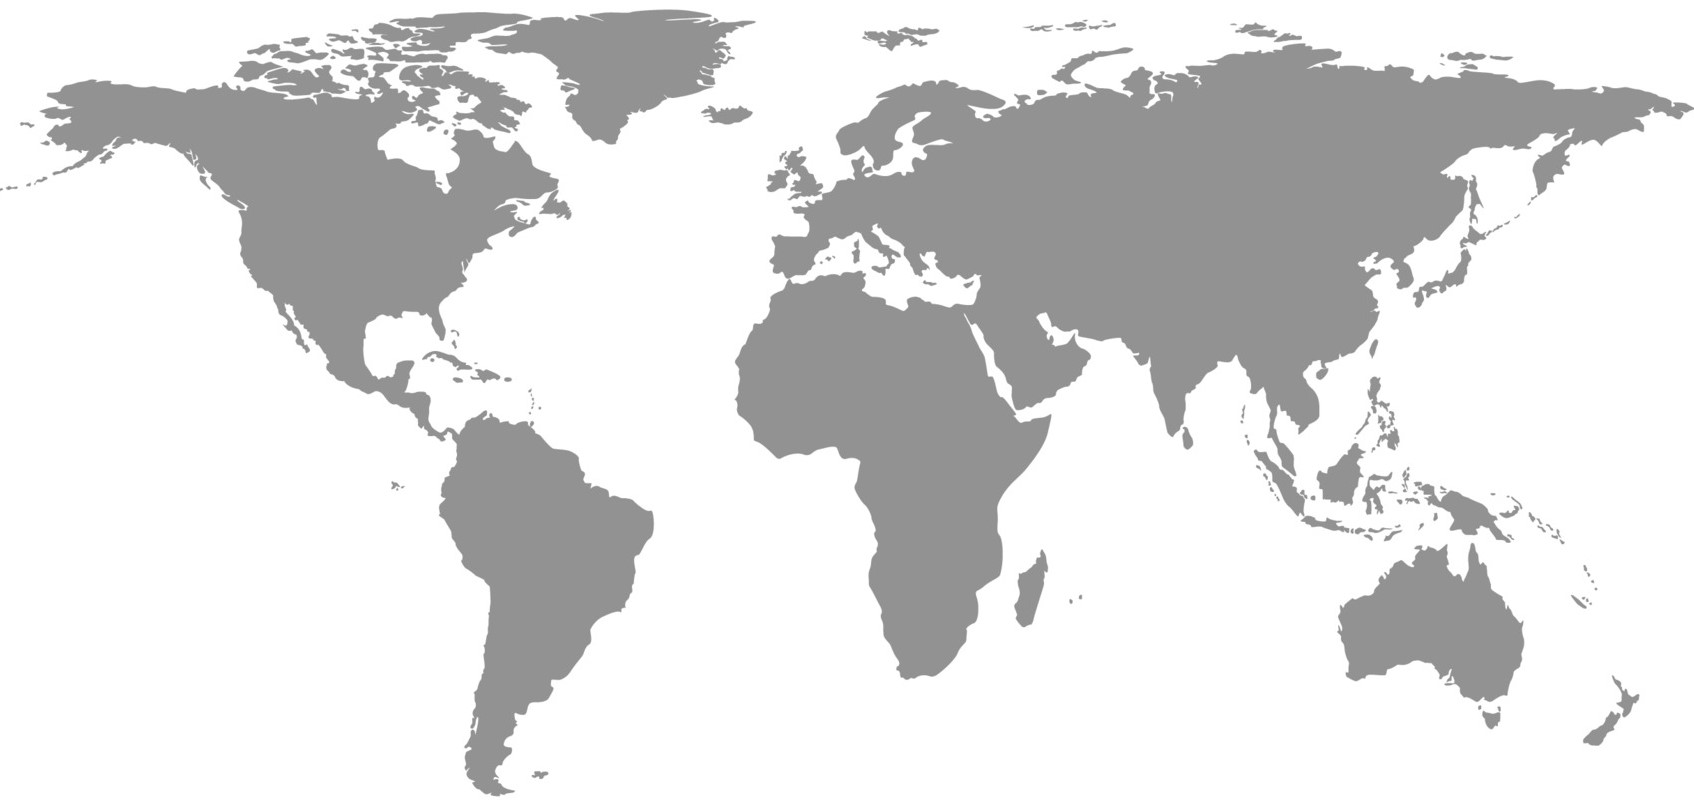

#Objetivo

El objetivo principal del proyecto es desarrollar un modelo de clasificacion que indetifique los paises en riesgo de dafault.
El default lo entedemos como numeros negativos en PBI, aumento significativo de porcentaje de deuda, tasa de desempleo y inflacion.
La poblacion es un factor muy importante ya que con esto se calcula el Pbi y de alli resultan las mayorias de formulas a utilizar.


Como objetivo secundario es recrear un datasets con todos aquellos paises que se encuentran en riesgo de default y calcular si se requiere un recorte de su deuda, tambien llamado "Haircut"(recorte).
Al lograr esto podemos crear un modelo predictivo para estos paises y anticipar su posible default.


Logrando esto seria el segundo articulo cientifico en conseguir estadisticas tan amplias sobre la economia global y ayudar a paises en desarrollo.
Y el primero en brindar un datasets publico para calcular los recortes, ya que el unico disponible es:

"Sovereign Defaults: The Price of Haircuts By Juan J. Cruces and Christoph Trebesch" y es de uso privado.




Datos Utilizados:

1. Tabla de Recortes de Deuda: Contiene información sobre recortes de deuda en varios países, incluyendo los años y el porcentaje de recorte.
2. Tabla de Población: Incluye datos de población de 218 países desde 1980 hasta 2023.
3. Inflación Porcentual: Datos históricos de la tasa de inflación para cada país desde 1980 hasta 2022.
4. Tasa de Desempleo: Datos históricos de la tasa de desempleo de cada paises desde 1991 hasta 2021.
5. Producto Bruto Interno (PBI): Datos históricos del PBI de cada país desde 1980 hasta 2023.
6. Deuda Histórica: Información sobre la deuda pública histórica de cada país desde 1980 hasta 2015.

# Fin del Proyecto

El proyecto busca crear un modelo predictivo robusto que utilice el análisis de datos históricos para identificar países en riesgo de default. Este modelo puede ser utilizado por economistas, analistas financieros y gobiernos para:
* Anticipar crisis económicas y tomar medidas preventivas.
* Optimizar la gestión de la deuda soberana.
* Informar decisiones de inversión y políticas económicas.

Resultados Esperados:
* Un conjunto de modelos predictivos basados en técnicas de machine learning.
* Informes detallados que describan los factores más influyentes en el riesgo de default.
* Visualizaciones que faciliten la comprensión de los datos y los resultados del modelo.
* Recomendaciones prácticas para la gestión de riesgos y la toma de decisiones económicas.

Impacto Potencial:
La capacidad de predecir el riesgo de default soberano tiene el potencial de mejorar significativamente la estabilidad económica global, reducir los costos asociados a las crisis de deuda y apoyar el desarrollo económico sostenible.

# 1) Subida de Datasets

Librerias necesarias para el analisis de datos

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

Configuracion del entorno de Google Drive en Google Colab

In [102]:
# Cargamos el datasets desde Github
# Cargar el dataset
Dataset = "https://github.com/Nahuelito22/ProyectoDS_ParteIII_Ghilardi_Nahuel/raw/main/DataSets.xlsx"



Extraemos cada hoja del datasets por separado

In [103]:
recortes_df = pd.read_excel(Dataset, sheet_name='Recortes',index_col="Años")
poblacion_df = pd.read_excel(Dataset, sheet_name='Poblacion',)
inflacion_df = pd.read_excel(Dataset, sheet_name='Inflacion Porcentual')
desempleo_df = pd.read_excel(Dataset, sheet_name='Tasa de desempleo')
pbi_df = pd.read_excel(Dataset, sheet_name='PBI')
deuda_df = pd.read_excel(Dataset, sheet_name='Deuda Historica')


In [104]:
# Convertir el formato de las tablas de datos de formato ancho a formato largo
poblacion_long_df = pd.melt(poblacion_df, id_vars=['Paises'], var_name='Año', value_name='Poblacion')
inflacion_long_df = pd.melt(inflacion_df, id_vars=['Paises'], var_name='Año', value_name='Inflacion')
desempleo_long_df = pd.melt(desempleo_df, id_vars=['Paises'], var_name='Año', value_name='Desempleo')
pbi_long_df = pd.melt(pbi_df, id_vars=['Paises'], var_name='Año', value_name='PBI')
deuda_long_df = pd.melt(deuda_df, id_vars=['Paises'], var_name='Año', value_name='Deuda')

# Convertir la columna 'Año' a formato datetime
poblacion_long_df['Año'] = pd.to_datetime(poblacion_long_df['Año'], format='%Y').dt.strftime('%Y')
inflacion_long_df['Año'] = pd.to_datetime(inflacion_long_df['Año'], format='%Y').dt.strftime('%Y')
desempleo_long_df['Año'] = pd.to_datetime(desempleo_long_df['Año'], format='%Y').dt.strftime('%Y')
pbi_long_df['Año'] = pd.to_datetime(pbi_long_df['Año'], format='%Y').dt.strftime('%Y')
deuda_long_df['Año'] = pd.to_datetime(deuda_long_df['Año'], format='%Y').dt.strftime('%Y')

# Establecer 'Año' como índice
poblacion_long_df.set_index('Año', inplace=True)
inflacion_long_df.set_index('Año', inplace=True)
desempleo_long_df.set_index('Año', inplace=True)
pbi_long_df.set_index('Año', inplace=True)
deuda_long_df.set_index('Año', inplace=True)


#2) Normalizacion de datos

Echaremos un vistaso a informacion relevante de cada datasets para saber si tenemos datos NaN, y como operar en ellos o que acciones tomar con esos datos.

In [105]:
recortes_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1995 to 1988
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Paises    180 non-null    object 
 1   Recortes  180 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [106]:
poblacion_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9548 entries, 1980 to 2023
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paises     9548 non-null   object 
 1   Poblacion  9548 non-null   float64
dtypes: float64(1), object(1)
memory usage: 223.8+ KB


In [107]:
inflacion_long_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8729 entries, 1980 to 2022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paises     8729 non-null   object 
 1   Inflacion  7957 non-null   float64
dtypes: float64(1), object(1)
memory usage: 204.6+ KB


In [108]:
desempleo_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7285 entries, 1991 to 2021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Paises     7285 non-null   object
 1   Desempleo  7285 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 170.7+ KB


In [109]:
pbi_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9548 entries, 1980 to 2023
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Paises  9548 non-null   object 
 1   PBI     9538 non-null   float64
dtypes: float64(1), object(1)
memory usage: 223.8+ KB


In [110]:
deuda_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6876 entries, 1980 to 2015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Paises  6876 non-null   object 
 1   Deuda   5773 non-null   float64
dtypes: float64(1), object(1)
memory usage: 161.2+ KB


Como se observa hay algunas fechas que posen varios NaN pero eso no quiere decir que sean para todos los paises, Ej( ya que la fecha 1980 pose los datos de todos los paises), los dataframe con mas NaN son Inflacion Porcentual y Deuda Historica.
La estrategia a aplicar es, si el pais posee menos del 50% de los datos solicitados ese registro no se tendra en cuenta para el analizis grafico.
A continuiacion veremos un ejemplo de un pais con menos del 50% de datos

Ejemplo del datafram de deuda historica con Afghanistan

In [111]:
deuda_long_df[deuda_long_df['Paises']=='Afghanistan']

,Paises,Deuda
Año,,
1980,Afghanistan,NaN
1981,Afghanistan,NaN
1982,Afghanistan,NaN
1983,Afghanistan,NaN
1984,Afghanistan,NaN
1985,Afghanistan,NaN
1986,Afghanistan,NaN
1987,Afghanistan,NaN
1988,Afghanistan,NaN


Funcion para eliminar datos con mas del 50% faltantes

In [112]:
# Aplicaremos una funcion para eliminar paises con mas del 50% de datos nulos y dividiremos por 100 para obtener un porcentaje

# Funcion de limpieza de NaN
def remove_countries_with_high_nan(dataframe, value_column, threshold=0.50, country_column='Paises'):
    country_nan_percentage = dataframe.isna().groupby(dataframe['Paises']).mean()
    countries_to_remove = country_nan_percentage[country_nan_percentage[value_column] > threshold].index
    cleaned_df = dataframe[~dataframe['Paises'].isin(countries_to_remove)]
    return cleaned_df

cleaned_inflacion_df = remove_countries_with_high_nan(inflacion_long_df, 'Inflacion', country_column='paises')
cleaned_deuda_df = remove_countries_with_high_nan(deuda_long_df, 'Deuda', country_column='paises')

# Dividir los valores por 100 para expresarlos como porcentaje
cleaned_inflacion_df['Inflacion'] = cleaned_inflacion_df['Inflacion'] / 100
cleaned_deuda_df['Deuda'] = cleaned_deuda_df['Deuda'] / 100

<ipython-input-112-c24f1d8beacc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_inflacion_df['Inflacion'] = cleaned_inflacion_df['Inflacion'] / 100
<ipython-input-112-c24f1d8beacc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_deuda_df['Deuda'] = cleaned_deuda_df['Deuda'] / 100


In [113]:
# Vamos a ver el ejemplo de afganistan
cleaned_deuda_df[cleaned_deuda_df['Paises']=='Afghanistan']

,Paises,Deuda
Año,,


Como se ve directemente se elimina todos los registros de Afghanistan o de cualquier pais que supere el 50%, se elige este porcentaje ya que son datos sensibles y es preferible manejar con exactitud los datos de los paises.

Esto se utilizara para la visualizacion de variables y verficiar alguina de las hipotesis.
Luego para la creacion del modelo se manejara otro metodo.

# 3) Graficos e Hipotesis

Una de las primeras hipótesis que nos surge es:
Cuando el país se encuentra cerca del quiebre(default), esto quiere decir que el pais no cuenta con el suficiente Pbi, su inflación es alta y no cumple los requisitos para pagar la deuda.
Ahí se genera lo llamado recorte (Haircut), esto quiere decir que piden un recorte de la deuda, y en vez de pagar el 100% pagan un porcentaje.
Normalmente eso le permite al país prosperar o tener un lapso de tiempo para mejorar su situación económica.


A continuacion se mostraran datos sobre Argentina, Brasil y Bolivia para realizar comparaciones, buscar patrones y predecir posibles riesgos.

Primero veremos el aumento de poblacion de los paises y como esto influye directamente sobre las medidas economicas

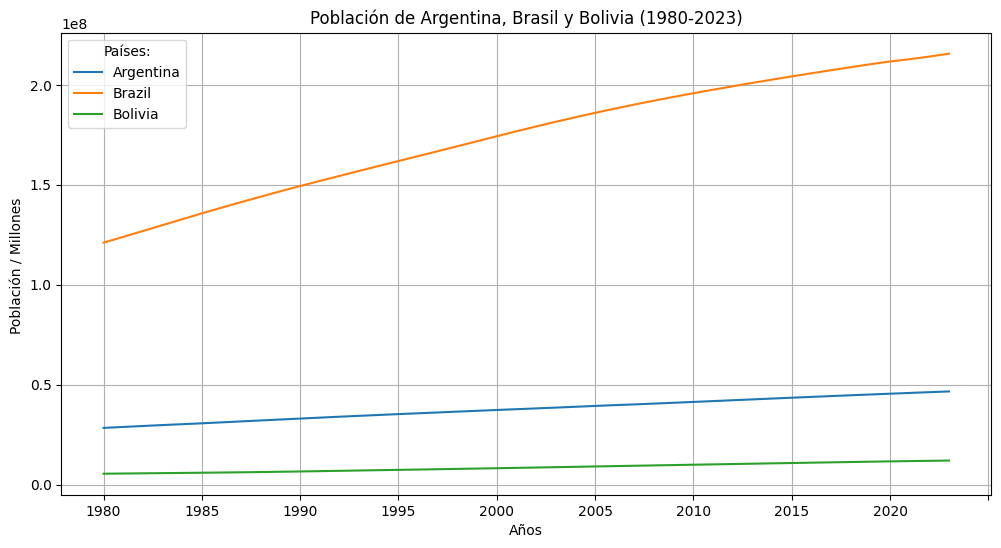

In [114]:
# Lista de países de interés
paises = ['Argentina','Brazil','Bolivia']

# Filtrar los datos para los países seleccionados
filtered_poblacion_df = poblacion_long_df[poblacion_long_df['Paises'].isin(paises)]

# Graficar la población de Argentina, Brazil y Bolivia desde 1980 hasta 2023
plt.figure(figsize=(12, 6))

# Usar un bucle para graficar cada país
for pais in paises:
    # Filtrar el dataframe por pais
    pais_df = filtered_poblacion_df[filtered_poblacion_df['Paises'] == pais]
    # Usar index filtrado del dataframe para el eje x de cada pais
    sns.lineplot(data=pais_df, x=pais_df.index, y='Poblacion', label=pais)

#Graficar
plt.title('Población de Argentina, Brasil y Bolivia (1980-2023)')
plt.xlabel('Años')
plt.ylabel('Población / Millones ')
plt.legend(title='Países:')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.show()


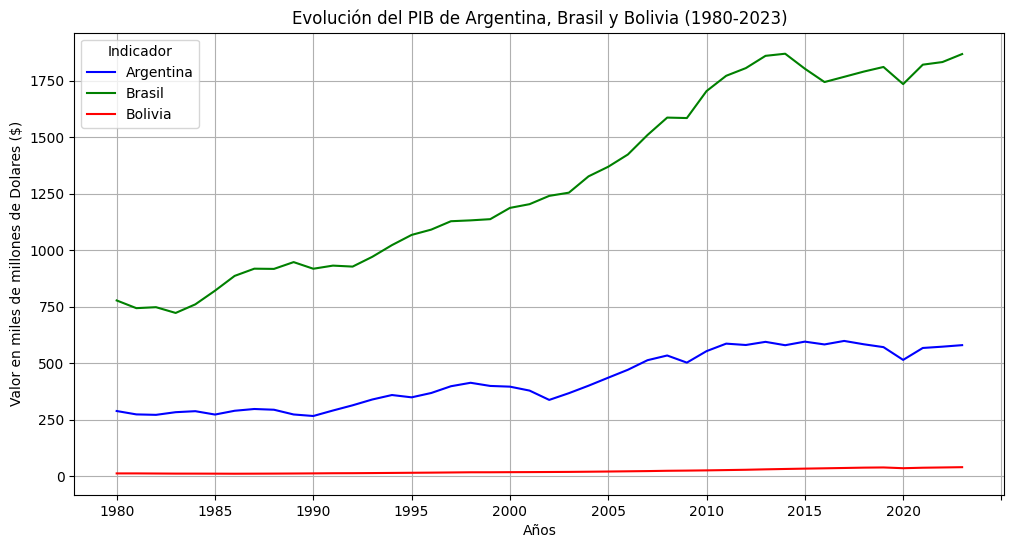

In [115]:
pbi_argentina = pbi_long_df[pbi_long_df['Paises'] == 'Argentina']
pbi_brazil = pbi_long_df[pbi_long_df['Paises'] == 'Brazil']
pbi_bolivia = pbi_long_df[pbi_long_df['Paises'] == 'Bolivia']

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar el PBI
sns.lineplot(data=pbi_argentina, x=pbi_argentina.index, y='PBI', label='Argentina', color='blue')
sns.lineplot(data=pbi_brazil, x=pbi_argentina.index, y='PBI', label='Brasil', color='green')
sns.lineplot(data=pbi_bolivia, x=pbi_argentina.index, y='PBI', label='Bolivia', color='red')

# Agregar títulos y etiquetas
plt.title('Evolución del PIB de Argentina, Brasil y Bolivia (1980-2023)')
plt.xlabel('Años')
plt.ylabel('Valor en miles de millones de Dolares ($)')

# Mostrar el gráfico
plt.legend(title='Indicador')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.show()


En cuanto a relacion directa, es muy posible que el constante aumento en la poblacion vaya de la mano con un aumento del PBI, esto si el pais apuesta por el desarrollo, como vemos Argentina y Brasil tienen un aumento significativo en su poblacion y esto va de la mano con el PBI. En cambio Bolivia tiene un aumento mas acelerado de su poblacion que del PBI

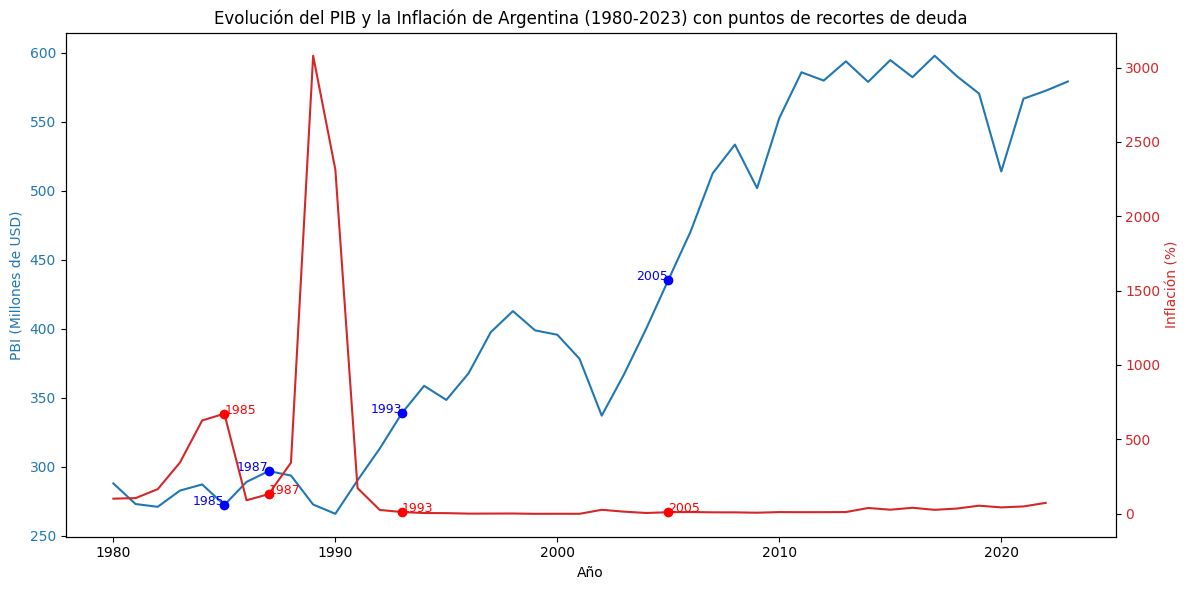

In [116]:
#Dataframes:
pbi_argentina = pbi_long_df[pbi_long_df['Paises'] == 'Argentina']
inflacion_argentina = cleaned_inflacion_df[cleaned_inflacion_df['Paises'] == 'Argentina']

pbi_argentina.index = pbi_argentina.index.astype(int)
inflacion_argentina.index = inflacion_argentina.index.astype(int)

# Años de recortes de deuda
recortes_argentina = [1985, 1987, 1993, 2005]

#Gráfico de doble eje y
fig, ax1 = plt.subplots(figsize=(12, 6))

#Gráfico del PBI
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('PBI (Millones de USD)', color=color)
ax1.plot(pbi_argentina.index, pbi_argentina['PBI'], color=color, label='PBI')
ax1.tick_params(axis='y', labelcolor=color)

#Puntos de recortes en el gráfico del PBI
for year in recortes_argentina:
    if year in pbi_argentina.index:
        ax1.plot(year, pbi_argentina.loc[year, 'PBI'], 'bo')
        ax1.text(year, pbi_argentina.loc[year, 'PBI'], f'{year}', color='blue', fontsize=9, ha='right')

#Eje y para la inflación
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Inflación (%)', color=color)
ax2.plot(inflacion_argentina.index, inflacion_argentina['Inflacion'], color=color, label='Inflación')
ax2.tick_params(axis='y', labelcolor=color)

#Puntos de recortes en el gráfico de la inflación
for year in recortes_argentina:
    if year in inflacion_argentina.index:
        ax2.plot(year, inflacion_argentina.loc[year, 'Inflacion'], 'ro')
        ax2.text(year, inflacion_argentina.loc[year, 'Inflacion'], f'{year}', color='red', fontsize=9, ha='left')

#Título:
plt.title('Evolución del PIB y la Inflación de Argentina (1980-2023) con puntos de recortes de deuda')
fig.tight_layout()
plt.show()


Como se ve en este grafico cuando Argentina tuvo que tomar medidas sobre su economia, especificamente sobre su deuda esto genero en ciertas fechas una evolucion favorable de su economia y en otras a largo plazo creo una recesión.

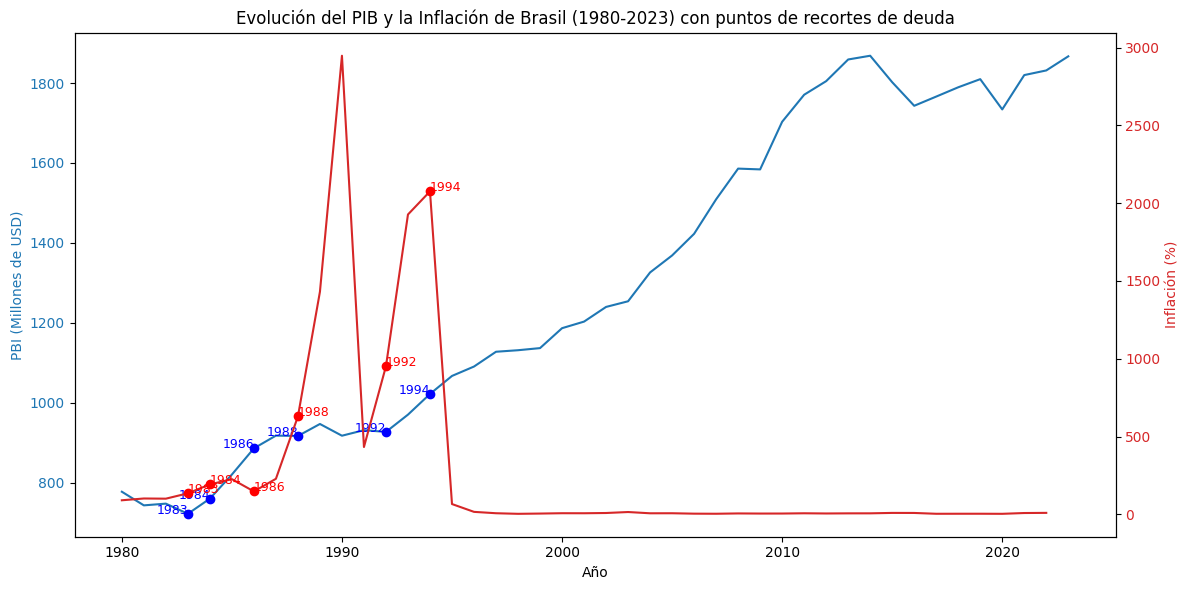

In [117]:
#Dataframes:
pbi_brazil = pbi_long_df[pbi_long_df['Paises'] == 'Brazil']
inflacion_brazil = cleaned_inflacion_df[cleaned_inflacion_df['Paises'] == 'Brazil']

pbi_brazil.index = pbi_brazil.index.astype(int)
inflacion_brazil.index = inflacion_brazil.index.astype(int)

# Años de recortes de deuda
recortes_brazil = [1983, 1984, 1986, 1988, 1992, 1994]

#Gráfico de doble eje y
fig, ax1 = plt.subplots(figsize=(12, 6))

#Gráfico del PBI
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('PBI (Millones de USD)', color=color)
ax1.plot(pbi_brazil.index, pbi_brazil['PBI'], color=color, label='PBI')
ax1.tick_params(axis='y', labelcolor=color)

#Puntos de recortes en el gráfico del PBI
for year in recortes_brazil:
    if year in pbi_brazil.index:
        ax1.plot(year, pbi_brazil.loc[year, 'PBI'], 'bo')
        ax1.text(year, pbi_brazil.loc[year, 'PBI'], f'{year}', color='blue', fontsize=9, ha='right')

#Eje y para la inflación
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Inflación (%)', color=color)
ax2.plot(inflacion_brazil.index, inflacion_brazil['Inflacion'], color=color, label='Inflación')
ax2.tick_params(axis='y', labelcolor=color)

#Puntos de recortes en el gráfico de la inflación
for year in recortes_brazil:
    if year in inflacion_brazil.index:
        ax2.plot(year, inflacion_brazil.loc[year, 'Inflacion'], 'ro')
        ax2.text(year, inflacion_brazil.loc[year, 'Inflacion'], f'{year}', color='red', fontsize=9, ha='left')

#Título:
plt.title('Evolución del PIB y la Inflación de Brasil (1980-2023) con puntos de recortes de deuda')
fig.tight_layout()
plt.show()


Como se ve sucede lo mismo con Brasil, solo que en este caso es mucho mas notable como los recortes de deuda generaron en dos oportunidades 1988 y 1992 un elevada inflacion pero en 1994, junto a una leve subida del PBI y otros factores el recorte ayuda considerablemente a que la economia del pais prospere.

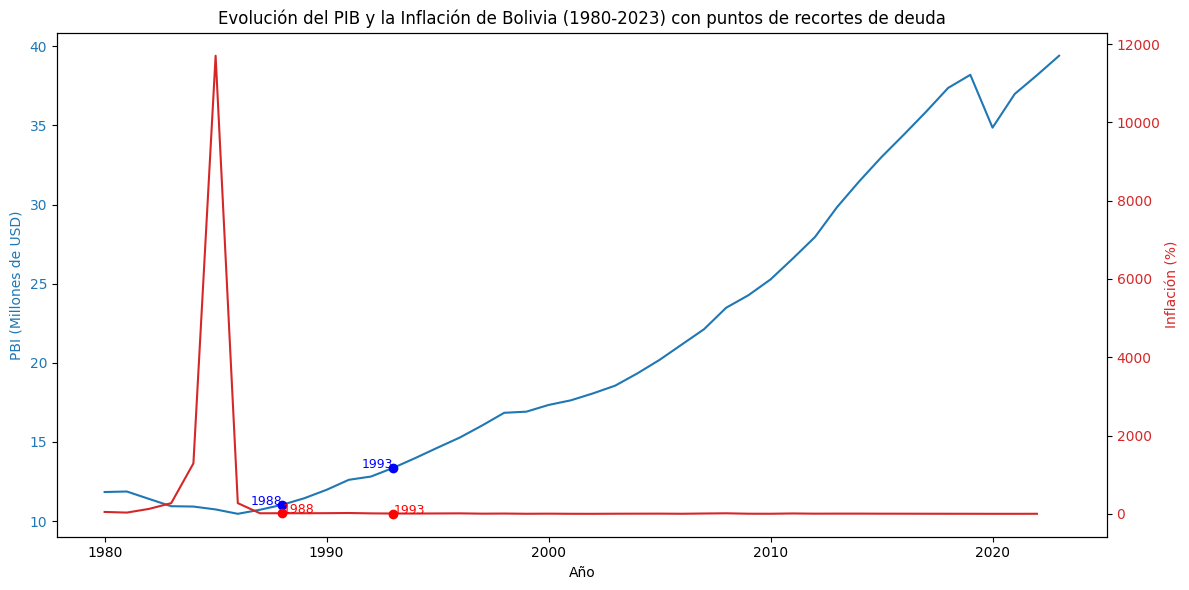

In [118]:
#Dataframes:
pbi_bolivia = pbi_long_df[pbi_long_df['Paises'] == 'Bolivia']
inflacion_bolivia = cleaned_inflacion_df[cleaned_inflacion_df['Paises'] == 'Bolivia']

pbi_bolivia.index = pbi_bolivia.index.astype(int)
inflacion_bolivia.index = inflacion_bolivia.index.astype(int)

# Años de recortes de deuda
recortes_bolivia = [1988, 1993,]

#Gráfico de doble eje y
fig, ax1 = plt.subplots(figsize=(12, 6))

#Gráfico del PBI
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('PBI (Millones de USD)', color=color)
ax1.plot(pbi_bolivia.index, pbi_bolivia['PBI'], color=color, label='PBI')
ax1.tick_params(axis='y', labelcolor=color)

#Puntos de recortes en el gráfico del PBI
for year in recortes_bolivia:
    if year in pbi_bolivia.index:
        ax1.plot(year, pbi_bolivia.loc[year, 'PBI'], 'bo')
        ax1.text(year, pbi_bolivia.loc[year, 'PBI'], f'{year}', color='blue', fontsize=9, ha='right')

#Eje y para la inflación
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Inflación (%)', color=color)
ax2.plot(inflacion_bolivia.index, inflacion_bolivia['Inflacion'], color=color, label='Inflación')
ax2.tick_params(axis='y', labelcolor=color)

#Puntos de recortes en el gráfico de la inflación
for year in recortes_bolivia:
    if year in inflacion_bolivia.index:
        ax2.plot(year, inflacion_bolivia.loc[year, 'Inflacion'], 'ro')
        ax2.text(year, inflacion_bolivia.loc[year, 'Inflacion'], f'{year}', color='red', fontsize=9, ha='left')

#Título:
plt.title('Evolución del PIB y la Inflación de Bolivia (1980-2023) con puntos de recortes de deuda')
fig.tight_layout()
plt.show()


Como se ve en estos graficos, cuando los paises estuvieron en default con su deuda y pidieron un recorte. Esto quiere decir que del porcentaje total el pais pide pagar un piorcentaje. Normalmente luego del recorte si el pais tiene un PBI en avanaze la inflacion logra detenerse o aplanarse durante un tiempo. Esto evidentemente favorece mucho los paises.

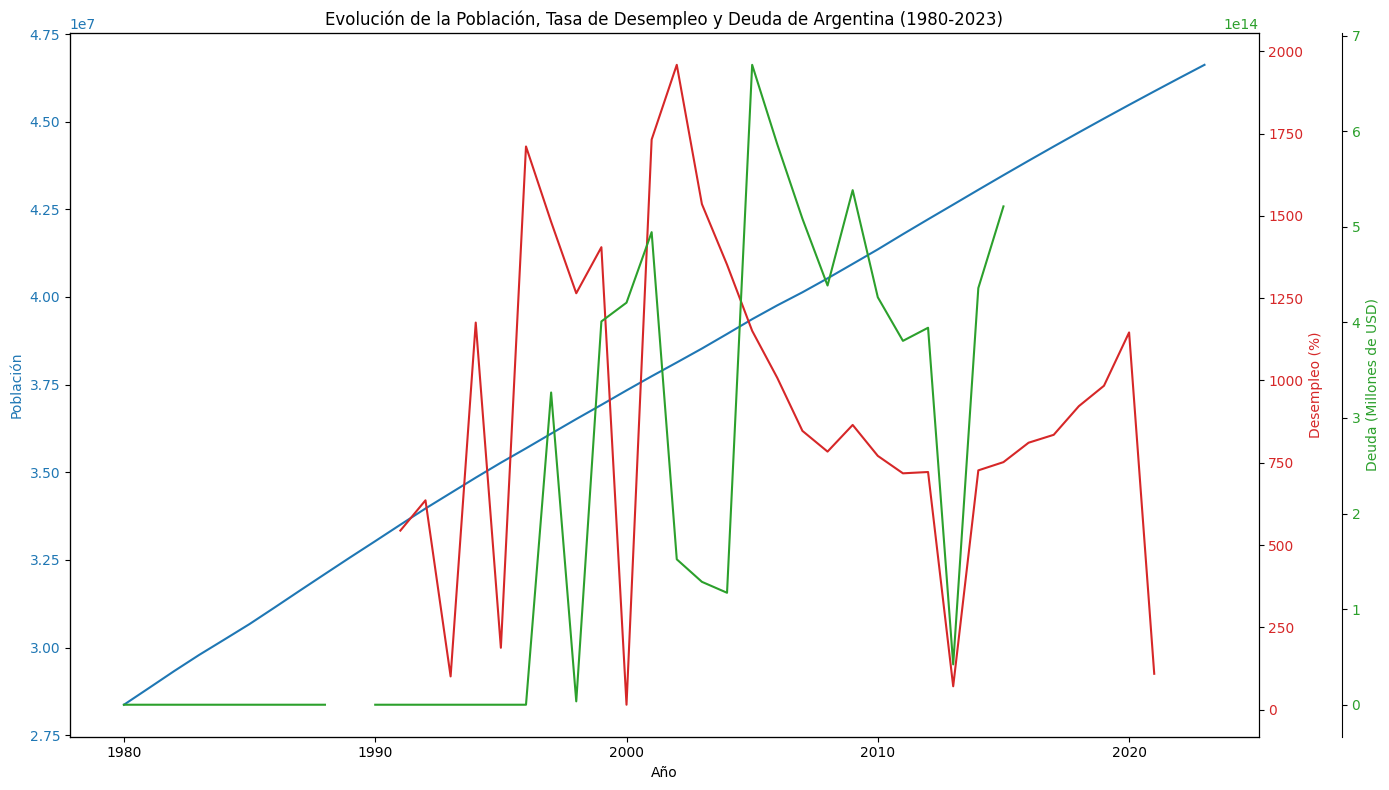

In [119]:
# Filtrar los datos para Argentina
poblacion_argentina = poblacion_long_df[poblacion_long_df['Paises'] == 'Argentina']
desempleo_argentina = desempleo_long_df[desempleo_long_df['Paises'] == 'Argentina']
deuda_argentina = deuda_long_df[deuda_long_df['Paises'] == 'Argentina']

# Convertir el índice a entero para que solo muestre el año
poblacion_argentina.index = poblacion_argentina.index.astype(int)
desempleo_argentina.index = desempleo_argentina.index.astype(int)
deuda_argentina.index = deuda_argentina.index.astype(int)

# Crear el gráfico de doble eje y
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de la población
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Población', color=color)
ax1.plot(poblacion_argentina.index, poblacion_argentina['Poblacion'], color=color, label='Población')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para el desempleo
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Desempleo (%)', color=color)
ax2.plot(desempleo_argentina.index, desempleo_argentina['Desempleo'], color=color, label='Desempleo')
ax2.tick_params(axis='y', labelcolor=color)

# Crear un tercer eje y para la deuda
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Deuda (Millones de USD)', color=color)
ax3.plot(deuda_argentina.index, deuda_argentina['Deuda'], color=color, label='Deuda')
ax3.tick_params(axis='y', labelcolor=color)

# Título y mostrar el gráfico
plt.title('Evolución de la Población, Tasa de Desempleo y Deuda de Argentina (1980-2023)')
fig.tight_layout()
plt.show()


En este grafico podemos observar la correlacion que tienen la variable de desempleo a lo largo de los años comparandolo con el crecimiento poblacional.
Generamos una linea extra con la deuda porque indirectamente esa deuda infiere en la poblacion y esta misma en el Pbi.



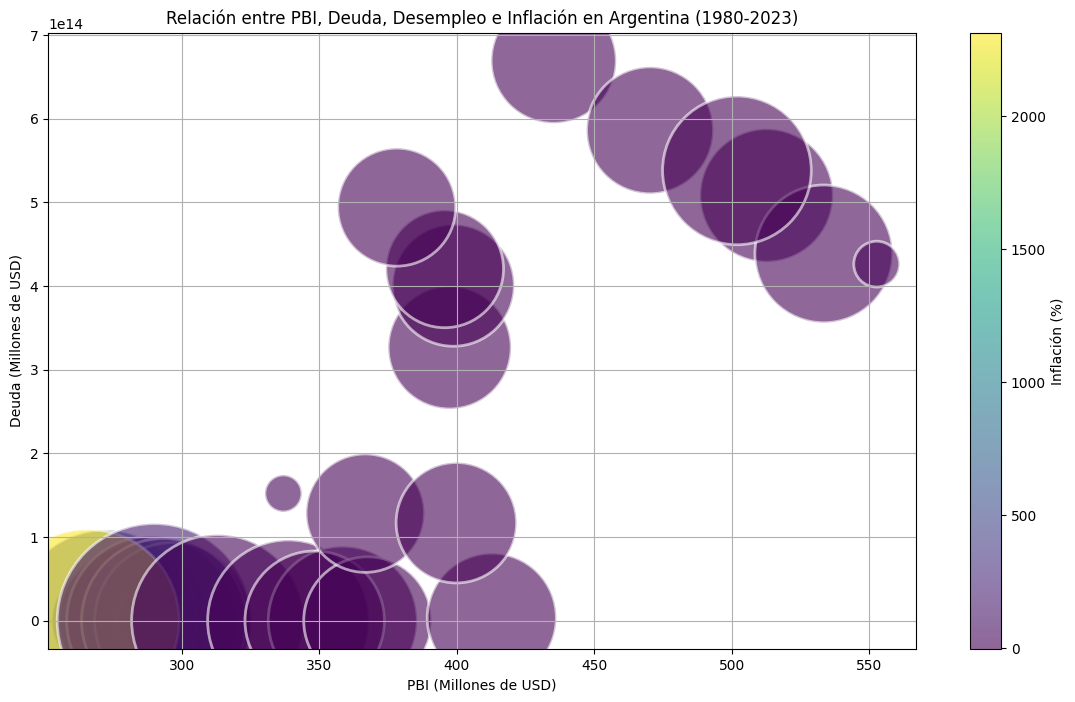

In [120]:
#Filatrar datos de argentina y establecer mismo indice para todos los dataframes
poblacion_argentina = poblacion_long_df[poblacion_long_df['Paises'] == 'Argentina']['Poblacion'].reset_index(drop=True)
desempleo_argentina = desempleo_long_df[desempleo_long_df['Paises'] == 'Argentina']['Desempleo'].reset_index(drop=True)
deuda_argentina = deuda_long_df[deuda_long_df['Paises'] == 'Argentina']['Deuda'].reset_index(drop=True)
inflacion_argentina = cleaned_inflacion_df[cleaned_inflacion_df['Paises'] == 'Argentina']['Inflacion'].reset_index(drop=True)
pbi_argentina = pbi_long_df[pbi_long_df['Paises'] == 'Argentina']['PBI'].reset_index(drop=True)

#Sacar años del dataframe poblacion
years = poblacion_long_df[poblacion_long_df['Paises'] == 'Argentina'].index

#Longitud minima entre las series
min_length = min(len(poblacion_argentina), len(desempleo_argentina), len(deuda_argentina), len(inflacion_argentina), len(pbi_argentina))

#Truncar las series a la minima longitud
poblacion_argentina = poblacion_argentina[:min_length]
desempleo_argentina = desempleo_argentina[:min_length]
deuda_argentina = deuda_argentina[:min_length]
inflacion_argentina = inflacion_argentina[:min_length]
pbi_argentina = pbi_argentina[:min_length]
years = years[:min_length]

#DataFrame
data_argentina = pd.DataFrame({
    'Año': years,
    'Poblacion': poblacion_argentina.values,
    'Desempleo': desempleo_argentina.values,
    'Deuda': deuda_argentina.values,
    'Inflacion': inflacion_argentina.values,
    'PBI': pbi_argentina.values
})

#Gráfico de burbujas
plt.figure(figsize=(14, 8))
bubble = plt.scatter(data_argentina['PBI'], data_argentina['Deuda'],
                     s=data_argentina['Desempleo']*10,
                     c=data_argentina['Inflacion'], cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)

plt.title('Relación entre PBI, Deuda, Desempleo e Inflación en Argentina (1980-2023)')
plt.xlabel('PBI (Millones de USD)')
plt.ylabel('Deuda (Millones de USD)')
plt.colorbar(bubble, label='Inflación (%)')
plt.grid(True)
plt.show()


Como se observa en el siguiente grafico argentina el diametro de la burbuja representa la cantidad de desempleo, la intensidad de los colores la inflacion.
De esto podemos hacer un suposicion que argentina tuvo una epoca de mucha tasa de desempleo pero a su vez el PBI no dejabada de aumentar ya que gracias a los Haircut y politicas monetarias la deuda se aplano o dismiuyo gradualmente, hasta principios del 2010 que comenzo un nuevo ciclo con la deuda que aumento exponencialmente de 3.8 miles de millones a mas de 6 para el 2015. Esto provoco una creciente tendencia a una nueva recesion o buscar medidas para un nuevo Haircut y evitar el dafult.

# 4) Procesamineto de datos para el modelo

Para obtener mejor resultados es necesario eliminar o tratar con los valores NaN  y ademas tener el dataset unificado

In [121]:
# Volvemos a leer los datasets para evitar errores a lo largo del codigo anterior
recortes_df = pd.read_excel(Dataset, sheet_name='Recortes')
poblacion_df = pd.read_excel(Dataset, sheet_name='Poblacion',)
inflacion_df = pd.read_excel(Dataset, sheet_name='Inflacion Porcentual')
desempleo_df = pd.read_excel(Dataset, sheet_name='Tasa de desempleo')
pbi_df = pd.read_excel(Dataset, sheet_name='PBI')
deuda_df = pd.read_excel(Dataset, sheet_name='Deuda Historica')

In [122]:
# Volvemos a leer los datasets para evitar errores a lo largo del codigo anterior
recortes_df = pd.read_excel(Dataset, sheet_name='Recortes')
poblacion_df = pd.read_excel(Dataset, sheet_name='Poblacion',)
inflacion_df = pd.read_excel(Dataset, sheet_name='Inflacion Porcentual')
desempleo_df = pd.read_excel(Dataset, sheet_name='Tasa de desempleo')
pbi_df = pd.read_excel(Dataset, sheet_name='PBI')
deuda_df = pd.read_excel(Dataset, sheet_name='Deuda Historica')

# Inicializar la lista de dataframes
dataframes_sin_modificar = [poblacion_df, inflacion_df, desempleo_df, pbi_df, deuda_df]

# Nombres de las hojas correspondientes a cada dataframe
nombres_hojas = ['Poblacion', 'inflacion', 'desempleo', 'pbi', 'deuda']

# Inicializar una lista para almacenar los dataframes reestructurados
dataframes_reestructurados = []

# Iterar sobre todas las hojas y reestructurarlas
for df, nombre_hoja in zip(dataframes_sin_modificar, nombres_hojas):
    df_melt = df.melt(id_vars=['Paises'], var_name='Año', value_name=nombre_hoja)
    dataframes_reestructurados.append(df_melt)

# Combinar todos los dataframes reestructurados en uno solo utilizando las columnas 'Paises' y 'Año' como claves
df_combinado = dataframes_reestructurados[0]
for df in dataframes_reestructurados[1:]:
    df_combinado = pd.merge(df_combinado, df, on=['Paises', 'Año'], how='outer')

# Ordenar el dataframe por 'Paises' y 'Año' para una mejor visualización
df_combinado = df_combinado.sort_values(by=['Paises', 'Año'])
# Guardar el DataFrame actualizado en un nuevo archivo Excel
#   df_combinado.to_excel('archivo_actualizado.xlsx', index=False)

# Import the necessary modules for downloading
#   from google.colab import files

# Descargar el archivo Excel actualizado
#   files.download('archivo_actualizado.xlsx') # Use the files object to download

In [123]:
# Lista de países válidos (esto es solo un ejemplo, debes completarla con todos los países que consideres válidos)
paises_validos = [
    "Afghanistan", "Albania", "Algeria", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas",
    "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize",
    "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana",
    "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde",
    "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo, Dem. Rep.",
    "Congo, Rep.", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba",
    "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea",
    "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France",
    "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada",
    "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras",
    "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland",
    "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya",
    "Kiribati", "Korea, Dem. People's Rep.", "Korea, Rep.", "Kosovo", "Kuwait",
    "Kyrgyz Republic", "Lao PDR", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi",
    "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania",
    "Mauritius", "Mexico", "Micronesia, Fed. Sts.", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia",
    "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger",
    "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland",
    "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino",
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles",
    "Sierra Leone", "Singapore", "Slovak Republic", "Slovenia", "Solomon Islands",
    "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan",
    "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan",
    "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine",
    "United Arab Emirates", "United Kingdom", "United States", "Uruguay",
    "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]
# Filtrar el dataframe para incluir solo los países válidos
df_filtrado = df_combinado[df_combinado['Paises'].isin(paises_validos)]

# Ordenar el dataframe filtrado por 'Paises' y 'Año' para una mejor visualización
df_filtrado = df_filtrado.sort_values(by=['Paises', 'Año'])

# Guardar el DataFrame filtrado en un nuevo archivo Excel (opcional)
df_filtrado.to_excel('archivo_filtrado.xlsx', index=False)

# Descargar el archivo Excel filtrado (si estás en Google Colab, por ejemplo)
from google.colab import files
files.download('archivo_filtrado.xlsx') # Use the files object to download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generamos una copia para utilizarla en el codigo siguiente

In [124]:
dfcopia = df_filtrado.copy()

En este codigo hacemos el ultimo filtrado, ya que habian muchos paises que no tenian ni el 50% de datos y colocamos como umbral un 95% para que cuando rellenemos los NaN no modifique tanto los valores que ya existen y no infiera mucho en el rendimiento del modelo de clasificacion.

In [125]:
# Definir el umbral del 95%
umbral = 0.95

# Contamos la cantidad de valores no nulos por país
conteo_no_nulo = dfcopia.groupby('Paises').count()

# Contar el número total de columnas menos 'Paises'
total_columnas = dfcopia.shape[1] - 1

# Calcular el porcentaje de valores no nulos por país
porcentaje_no_nulo = conteo_no_nulo / total_columnas

# Filtrar los países que tienen al menos el 95% de datos completos en las columnas numéricas
paises_validos = porcentaje_no_nulo[(porcentaje_no_nulo >= umbral).all(axis=1)].index
df_filtrado = dfcopia[dfcopia['Paises'].isin(paises_validos)]

In [126]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6556 entries, 0 to 9547
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paises     6556 non-null   object 
 1   Año        6556 non-null   object 
 2   Poblacion  6556 non-null   float64
 3   inflacion  6208 non-null   float64
 4   desempleo  4619 non-null   float64
 5   pbi        6546 non-null   float64
 6   deuda      4695 non-null   float64
dtypes: float64(5), object(2)
memory usage: 409.8+ KB


In [127]:
df_filtrado.head()

,Paises,Año,Poblacion,inflacion,desempleo,pbi,deuda
0,Afghanistan,1980,15044289.0,1340.0,NaN,7.803881,NaN
217,Afghanistan,1981,13676225.0,2220.0,NaN,8.667062,NaN
434,Afghanistan,1982,12582762.0,1820.0,NaN,8.213305,NaN
651,Afghanistan,1983,12439282.0,1590.0,NaN,8.728287,NaN
868,Afghanistan,1984,12768664.0,2040.0,NaN,9.884695,NaN


In [128]:
df_copia_seguridad = df_filtrado.copy()

In [129]:
# Supongamos que tu DataFrame se llama 'df'
# Reemplaza los valores faltantes por la mediana de cada columna por país
df=df_copia_seguridad.groupby('Paises').apply(lambda x: x.fillna(x.median(numeric_only=True)))

# Reseteamos el índice para mantener el formato original
df=df.reset_index(drop=True)

#Descargamos para corroborar
df.to_excel('df.xlsx', index=False)
from google.colab import files
files.download('df.xlsx') # Use the files object to download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Luego de todas estas secciones de codigo obtenemos el datafram completamente funcional.
Vamos a echarle un vistazo y revisar que no contenga NaN

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556 entries, 0 to 6555
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paises     6556 non-null   object 
 1   Año        6556 non-null   object 
 2   Poblacion  6556 non-null   float64
 3   inflacion  6556 non-null   float64
 4   desempleo  6556 non-null   float64
 5   pbi        6556 non-null   float64
 6   deuda      6556 non-null   float64
dtypes: float64(5), object(2)
memory usage: 358.7+ KB


#5) Modelos

Primero cargamos el archivo y generamos una copia por seguridad, eleccionamos las columnas numericas y normalizamos los datos

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Cargar el DataFrame
df = df

# Seleccionamos las columnas numericas para el clsutering
X = df[['Poblacion', 'inflacion', 'desempleo', 'pbi', 'deuda']]

# Normalizacion de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostramos los primeros 5 registros para ver si se hizo correctamente la normalizacion
print(X_scaled[:5])


[[-0.16190277 -0.05838728  0.75494052 -0.22755642  0.06879245]
 [-0.17189387 -0.03783586  0.75494052 -0.22694447  0.06879245]
 [-0.17987954 -0.04717741  0.75494052 -0.22726616  0.06879245]
 [-0.18092739 -0.05254881  0.75494052 -0.22690107  0.06879245]
 [-0.17852188 -0.04203956  0.75494052 -0.22608123  0.06879245]]


Ahora utilizaremos el metodo del codo para verificar la cantidad optima de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

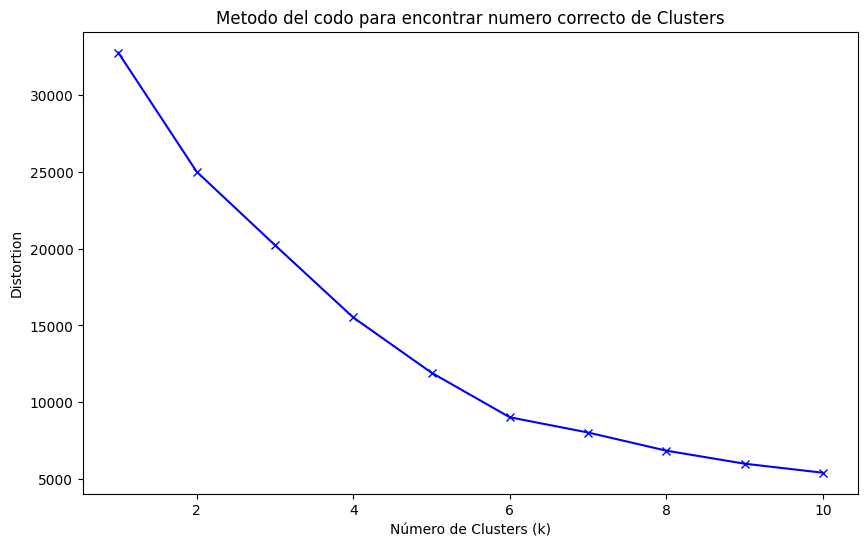

In [132]:
# Metodo del codo
def elbow_method(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Metodo del codo para encontrar numero correcto de Clusters')
    plt.show()

elbow_method(X_scaled)


Como se ve en la imagen no es tan evidente donde el codo desacelera, para mi algoritmo de K-means vamos a utilizar 2, igualmente se llevo a cabo una prueba con todos los valores posibles desde 2 a 10, la mayoria tenia un rendimiento inferior al 0.50. Pero con 2 clusters se logra un rendimiento de 0.79

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplico K-Means con el número óptimo de clusters
k_optimo = 2
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluación con Silhouette Score para K-Means
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score para K-Means: {silhouette_kmeans:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score para K-Means: 0.79


Como se ve se logra un 0.79 de score.

Ahora aplicaremos el algoritmo DBSCAN, similar a Kmenas se llevo a cabo un muestreo con todos los valores posibles para epsilon y min points, y como mejor el rendimiento se obtuvo con epsilon=2 y min=5 se dejaron estos valores para el modelo.

In [134]:
from sklearn.cluster import DBSCAN

# Aplico DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


# Filtro de posibles outliers
mask = dbscan_labels != -1
silhouette_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
print(f'Silhouette Score para DBSCAN: {silhouette_dbscan:.2f}')


Silhouette Score para DBSCAN: 0.79


Como se ve se logra un score de 0.79

Para poder visualizar los datos de manera mas sencilla utilizare la tecnica de PCA, para reducir la dimencionalidad y observar los clusters generados por ambos modelos.

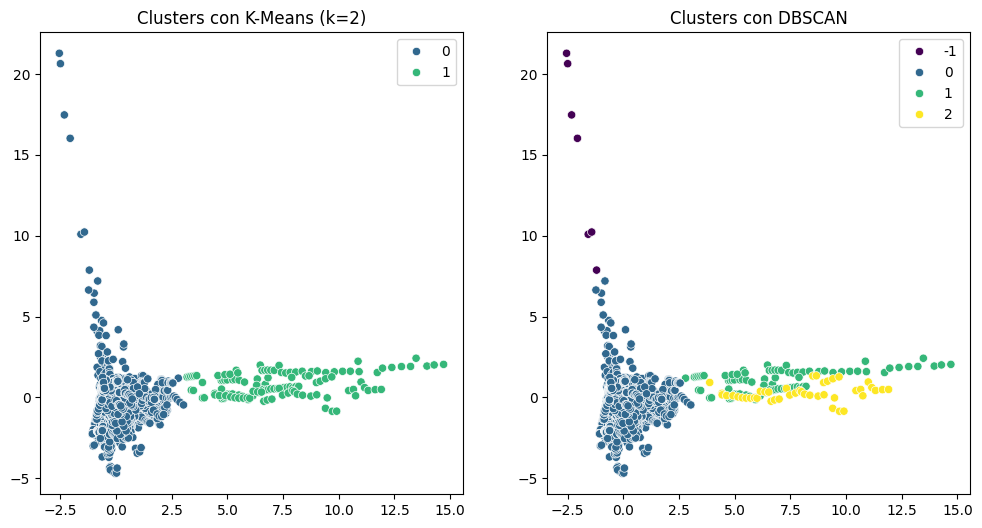

In [135]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reducción de dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de clusters con K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'Clusters con K-Means (k={k_optimo})')

# Visualización de clusters con DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('Clusters con DBSCAN')

plt.show()


# 6) Conclusiones

Los resultados obtenidos por los modelos fueron exitosos.
Para K-Means se obtuvo un score de 0.79 y para DBSCAN se obtuvo un score de 0.79






Ambos modelos performaron bastante bien, lo interesante es como dividieron los grupos.
Para K-Means genero dos clústeres y estos podemos interpretarlos como paises en riesgo de default y paises que no están en riesgo de default.
Por otro lado, DBSCAN genero 4 clústeres y esto podemos interpretarlo como paises en desde el estado crítico, al mejor estado posible en una escala de -1 a 2.



Esto me ayuda muchísimo para la meta general del proyecto que seria predecir el riesgo de un país, pero para que el proyecto en si tuviese una buena performance era necesario descartar aquellos paises que se encuentran en buen estado económico actual.



En conclusiones generales ambos modelos serian útiles, pero para obtener una mayor especificidad sobre que paises predecir un posible riesgo, para así tomar medidas correspondientes seria DBSCAN. Ya que este nos devolvió 4 tipo de clústeres bien marcados y nos ayuda a interpretar la situación actual de los paises.

